In [1]:
!pip install --upgrade ~/ogip
# !pip install ~/odafunction

import matplotlib as mpl

mpl.use('Agg')

from matplotlib import pylab as plt
from astropy.io import fits
import ogip
import ogip.core

Processing /home/savchenk/ogip
  Preparing metadata (setup.py) ... done
  Created wheel for ogip: filename=ogip-0.2.1-py2.py3-none-any.whl size=9472 sha256=a29f15b6616b3d385f5c7d24085832abe1ff3b4642badfcd8148a686f5973a7c
  Stored in directory: /tmp/pip-ephem-wheel-cache-s0g46y1w/wheels/9e/7d/68/8c4ead01ff81d5c323908dd08ffa9cf389eed4d5526438f2c5
Successfully built ogip
  Attempting uninstall: ogip
    Found existing installation: ogip 0.2.1
    Uninstalling ogip-0.2.1:
      Successfully uninstalled ogip-0.2.1


In [2]:
# oda:version "v1.19"

focus_obs_name='r2559'


* Subject: 	Re: GRB221009A
* Date: 	Fri, 28 Oct 2022 17:37:00 +0200
* From: 	ejourdain <ejourdain@irap.omp.eu>
* To: 	Volodymyr Savchenko [UNIGE] <Volodymyr.Savchenko@unige.ch>
* CC: 	Jean-Pierre Roques <jroques@irap.omp.eu>, Carlo Ferrigno <carlo.ferrigno@unige.ch>


The spectrum in attachement is averaged over rev 2558 and 2559. Adding rev 2560 decreases the signal to noise ratio (which is not high anyway)

The two broad channels below and above 551 keV may be used to test scenarii with broad shifted annihilation feature if relevant.


 


In [3]:
from odafunction.executors import default_execute_to_value
from odafunction.func.urifunc import URIipynbFunction, URIValue

# focus_obs_name='r25589'

# TODO: set version restriction here
# TODO: make nb2workflow store in remote storages
# TODO: make possible to disrupt equivalence with indications
# TODO: make common fd/fc depending on

v = default_execute_to_value(URIipynbFunction.from_generic_uri("file:///home/savchenk/grb221009/grbbase.ipynb")(focus_obs_name=focus_obs_name), valueclass=URIValue, cached=True)

In [4]:
import io
import tempfile
import base64
import tarfile
    
with tarfile.open(v['output_values']['fits_pack_url'].replace("file://", "")) as tar:
    tar.extractall(path=f"grbbase_fitspack_{focus_obs_name}")

!ls -ltor grbbase_fitspack*/*fits

-rw-rw-r-- 1 savchenk  4472640 Feb  1 18:07 grbbase_fitspack_r25589/isgri_total_3p_mosaic.fits
-rw-rw-r-- 1 savchenk 17262720 Feb  1 18:07 grbbase_fitspack_r25589/jemx1_total_3p_mosaic.fits
-rw-rw-r-- 1 savchenk 17262720 Feb  1 18:07 grbbase_fitspack_r25589/jemx2_total_3p_mosaic.fits
-rw-rw-r-- 1 savchenk    14400 Feb  1 18:07 grbbase_fitspack_r25589/JMX1_spectrum_GRB221009A.fits
-rw-rw-r-- 1 savchenk    14400 Feb  1 18:07 grbbase_fitspack_r25589/JMX2_spectrum_GRB221009A.fits
-rw-rw-r-- 1 savchenk    17280 Feb  1 18:07 grbbase_fitspack_r25589/IBIS_spectrum_GRB221009A.fits
-rw-rw-r-- 1 savchenk  4011840 Feb  1 19:36 grbbase_fitspack_r2560/isgri_r2558_mosaic.fits
-rw-rw-r-- 1 savchenk 14541120 Feb  1 19:36 grbbase_fitspack_r2560/jemx1_r2558_mosaic.fits
-rw-rw-r-- 1 savchenk 14541120 Feb  1 19:36 grbbase_fitspack_r2560/jemx2_r2558_mosaic.fits
-rw-rw-r-- 1 savchenk    17280 Feb  1 19:36 grbbase_fitspack_r2560/JMX1_arf_GRB221009A_r2558.fits
-rw-rw-r-- 1 savchenk    95040 Feb  1 19:36 grbbas

In [5]:
!ls -lotr grbbase_fitspack_{focus_obs_name}/*

jmx1_pha = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/JMX1_spectrum_GRB221009A_{focus_obs_name}.fits")
jmx1_pha

-rw-rw-r-- 1 savchenk  4161600 Feb  6 23:35 grbbase_fitspack_r2559/isgri_r2559_mosaic.fits
-rw-rw-r-- 1 savchenk 15030720 Feb  6 23:35 grbbase_fitspack_r2559/jemx1_r2559_mosaic.fits
-rw-rw-r-- 1 savchenk 15030720 Feb  6 23:35 grbbase_fitspack_r2559/jemx2_r2559_mosaic.fits
-rw-rw-r-- 1 savchenk 15030720 Feb  6 23:36 grbbase_fitspack_r2559/jemx1_mosaic.fits
-rw-rw-r-- 1 savchenk 15030720 Feb  6 23:36 grbbase_fitspack_r2559/jemx2_mosaic.fits
-rw-rw-r-- 1 savchenk  4161600 Feb  6 23:36 grbbase_fitspack_r2559/isgri_mosaic.fits
-rw-rw-r-- 1 savchenk  4161600 Feb  6 23:36 grbbase_fitspack_r2559/isgrihe_mosaic.fits
-rw-rw-r-- 1 savchenk    17280 Feb  6 23:36 grbbase_fitspack_r2559/JMX1_lc_GRB221009A.fits
-rw-rw-r-- 1 savchenk    17280 Feb  6 23:36 grbbase_fitspack_r2559/JMX2_lc_GRB221009A.fits
-rw-rw-r-- 1 savchenk    17280 Feb  6 23:36 grbbase_fitspack_r2559/IBIS_lc_GRB221009A.fits
-rw-rw-r-- 1 savchenk    17280 Feb  6 23:36 grbbase_fitspack_r2559/JMX1_arf_GRB221009A_r2559.fits
-rw-rw-r-- 1 s

In [6]:
import ogip.core

from ogip.spec import PHAI, RMF, rebin, log_bins
from ogip.tools import plot as plot_spec


import requests

r8_t1, r8_t2 = map(float, requests.get(f'https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/converttime/REVNUM/2558/IJD').text.split()[1:])
r9_t1, r9_t2 = map(float, requests.get(f'https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/converttime/REVNUM/2559/IJD').text.split()[1:])


isgri_pha = PHAI.from_file_name(f"grbbase_fitspack_{focus_obs_name}/IBIS_spectrum_GRB221009A_{focus_obs_name}.fits")
isgri_rmf = RMF.from_file_name(f"grbbase_fitspack_{focus_obs_name}/IBIS_rmf_GRB221009A_{focus_obs_name}.fits")

# averaged over rev 2558 and 2559
spi_rmf = ogip.core.open_something("spi/rmf_GRB2rGRB2022sgrsp10aCVGRB_photo_GRB221009A_avrg.fits")
spi_pha = ogip.core.open_something("spi/spectrum_GRB2rGRB2022sgrsp10aCVGRB_photo_GRB221009A_avrg.fits")

jmx1_pha = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/JMX1_spectrum_GRB221009A_{focus_obs_name}.fits")
jmx1_rmf = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/JMX1_rmf_GRB221009A_{focus_obs_name}.fits")
jmx1_arf = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/JMX1_arf_GRB221009A_{focus_obs_name}.fits")

jmx2_pha = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}//JMX2_spectrum_GRB221009A_{focus_obs_name}.fits")
jmx2_rmf = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}//JMX2_rmf_GRB221009A_{focus_obs_name}.fits")
jmx2_arf = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}//JMX2_arf_GRB221009A_{focus_obs_name}.fits")


from astropy.time import Time

ijd2isot = lambda ijd: Time(ijd + 51544, format='mjd').isot
spec2isot12 = lambda spec: (ijd2isot(fits.open(spec.filename)[1].header['TSTART']), ijd2isot(fits.open(spec.filename)[1].header['TSTOP']))

spec2isot12(jmx1_pha), spec2isot12(isgri_pha), (ijd2isot(r8_t1), ijd2isot(r9_t2))

(('2022-10-11T13:38:21.696', '2022-10-13T00:00:13.779'),
 ('2022-10-11T14:43:14.699', '2022-10-13T00:59:36.781'),
 ('2022-10-08T17:45:28.184', '2022-10-14T01:28:14.184'))

In [7]:
# TODO

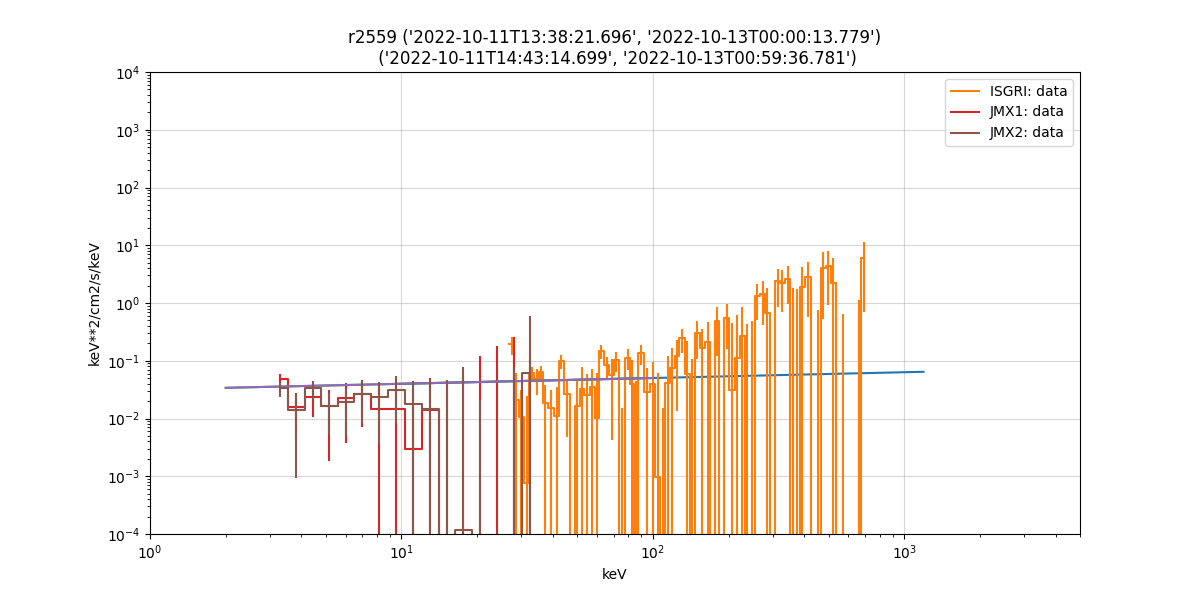

In [8]:
from ogip.spec import PHAI, RMF, rebin, log_bins
from ogip.tools import plot as plot_spec


# isgri_pha = PHAI.from_file_name("IBIS_spectrum_GRB221009A.fits")
# isgri_rmf = RMF.from_file_name("IBIS_rmf_GRB221009A.fits")

isgri_pha_rebinned, isgri_rmf_rebinned = rebin(isgri_pha, isgri_rmf, log_bins(50, 25, 700))

spi_pha_rebinned, spi_rmf_rebinned = rebin(spi_pha, spi_rmf, log_bins(3, 25, 1000))
# spi_pha_rebinned, spi_rmf_rebinned = rebin(spi_pha, spi_rmf, log_bins(5, 25, 600))


model = lambda x:(7e-5*(x/25.)**-1.9)

for unfolded in True, False:
    f = plt.figure(figsize=(12, 6))
# for unfolded in False, :
    e_power = 2 if unfolded else 0

    # plot_spec(isgri_pha, model, isgri_rmf, fig=f, label_prefix="ISGRI", unfolded=unfolded, e_power=e_power)
    plot_spec(isgri_pha_rebinned, model, isgri_rmf_rebinned, fig=f, label_prefix="ISGRI", unfolded=unfolded, e_power=e_power)

    isgri_pha_rebinned.to_fits("isgri_rebinned_pha.fits")
    isgri_rmf_rebinned.to_fits("isgri_rebinned_rmf.fits")

    # plot_spec(spi_pha_rebinned, model, spi_rmf_rebinned, fig=f, label_prefix="SPI", unfolded=unfolded, e_power=e_power)

    if 'r25589' in focus_obs_name:
        plot_spec(spi_pha, model, spi_rmf, fig=f, label_prefix="SPI", unfolded=unfolded, e_power=e_power)
        
    plot_spec(jmx1_pha, model, jmx1_rmf, arf=jmx1_arf, fig=f, label_prefix="JMX1", unfolded=unfolded, e_power=e_power)
    plot_spec(jmx2_pha, model, jmx2_rmf, arf=jmx2_arf, fig=f, label_prefix="JMX2", unfolded=unfolded, e_power=e_power)

    # early and total jemxX spec are weird

    if unfolded:
        plt.ylabel(f"keV**{e_power}/cm2/s/keV")
    else:
        plt.ylabel("counts/s/keV")

    plt.xlabel("keV")

    plt.xlim([1, 5e3])
    plt.ylim([1e-4, 1e4])
    # plt.loglog()

    plt.grid(alpha=0.5)

    plt.title(f"{focus_obs_name} {spec2isot12(jmx1_pha)}\n {spec2isot12(isgri_pha)}")

    fn_png = f"spec_afterglow_counts_{'un' if unfolded else ''}folded.png"
    plt.savefig(fn_png.replace(".png", ".pdf"))
    plt.savefig(fn_png)

from IPython.display import Image
Image("spec_afterglow_counts_unfolded.png")
# Image("spec_afterglow_counts_True.png")

    # TODO: add in grey other data
    # TODO: plot by period

In [9]:
import numpy as np

In [10]:
sn_max = 0 # np.max(d['RATE'] / d['STAT_ERR'])
sn = 0 # np.max(d['RATE'] / d['STAT_ERR'])
sn_total = 0 # np.sum(d['RATE']) / np.sum(d['STAT_ERR']**2)**0.5
exposure = 0 # spec[2].header['EXPOSURE']
ag_spec="spec_afterglow_counts_unfolded.pdf"